# K Mean Clustering

Objective: Winequality clustering  
Dataset: winequality.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('winequality.csv')
print(data.shape)
data.head()

(6497, 14)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


## Check Null Value

In [2]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

## Data Exploration

white    4898
red      1599
Name: color, dtype: int64


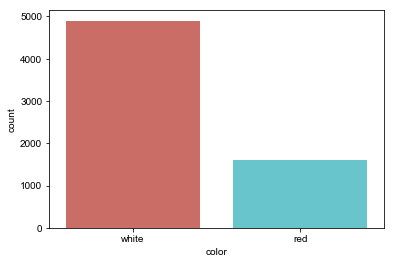

In [3]:
print(data['color'].value_counts())

sns.countplot(x='color',data = data, palette='hls',order = data['color'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

0    5220
1    1277
Name: good, dtype: int64


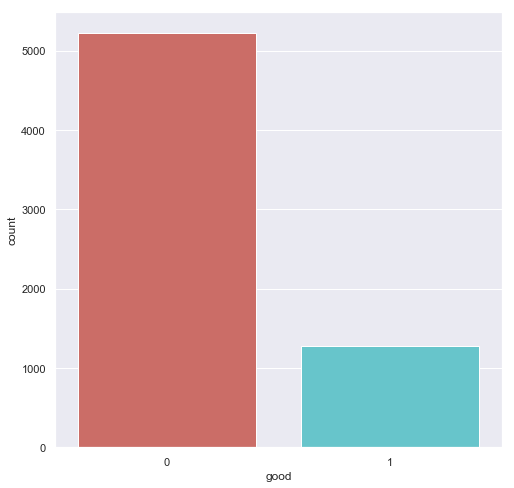

In [4]:
print(data['good'].value_counts())

sns.countplot(x='good',data = data, palette='hls',order = data['good'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


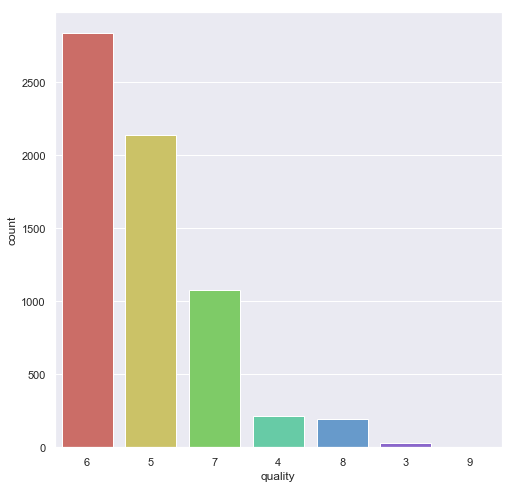

In [5]:
print(data['quality'].value_counts())

sns.countplot(x='quality',data = data, palette='hls',order = data['quality'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [6]:
data["color"] = data["color"].astype('category')
data["color#"] = data["color"].cat.codes 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,color#
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red,0


## Drop Column

In [7]:
data.drop(['color'],axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color#
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


## Correlation

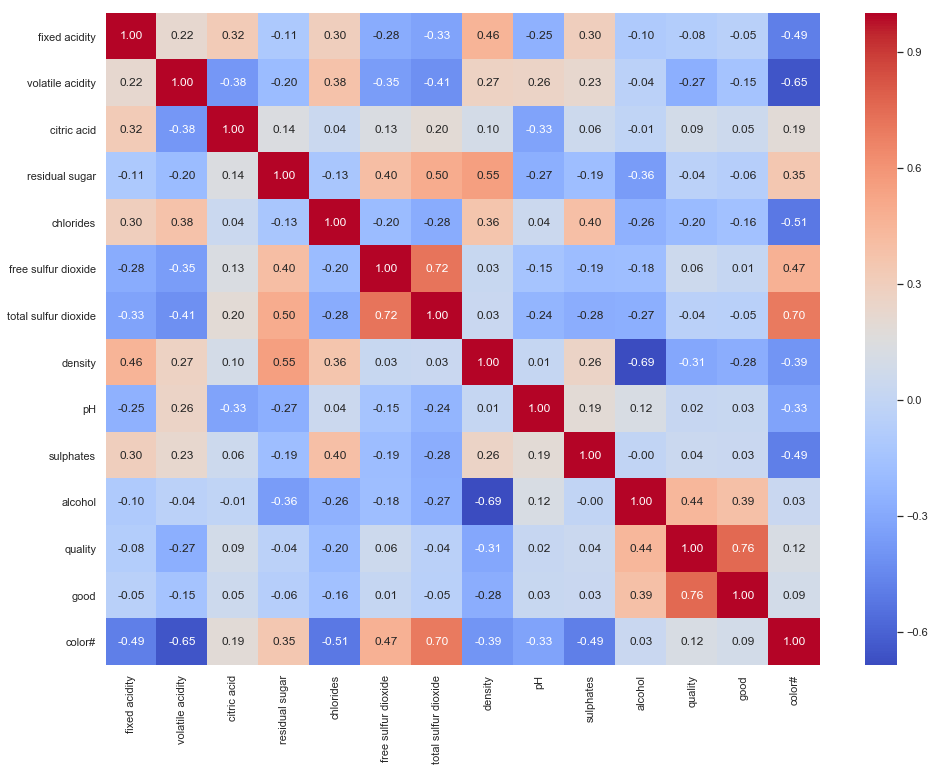

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [9]:
corr_rank = data.corr()
corr_rank["quality"].sort_values(ascending=False)

quality                 1.000000
good                    0.759360
alcohol                 0.444319
color#                  0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

## Data Standardization

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (6497, 14)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333, 0.        , 0.        ],
       [0.33057851, 0.53333333, 0.        , 0.03067485, 0.14784053,
        0.08333333, 0.140553  , 0.18681319, 0.37209302, 0.25842697,
        0.26086957, 0.33333333, 0.        , 0.        ]])

## Find the Best K

In [11]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[3125.247019497844, 1762.4280981569223, 830.8554532136973, 628.8299324863218, 537.3918581860746, 500.6482761917648, 472.63880780585214, 444.9408123407333, 425.1469221850609, 408.4702060792906, 395.7465896846754, 384.9072727851665, 374.145889418468, 367.4332999175949]


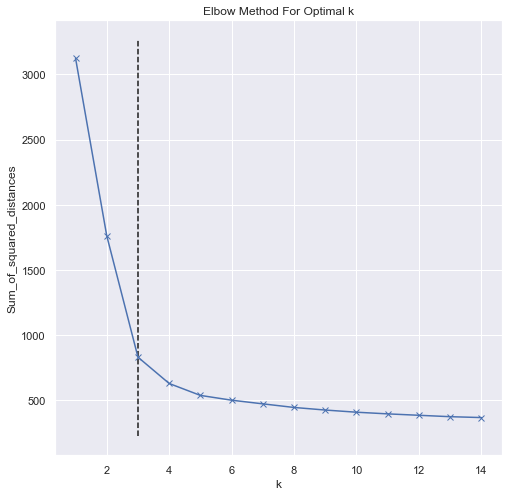

The best k: 3


In [12]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [13]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (6497,)


array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

## Assign Labels Cluster to Dataframe

In [14]:
data["KM_Cluster"] = labels
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color#,KM_Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0


## Cluster 2D Visualization

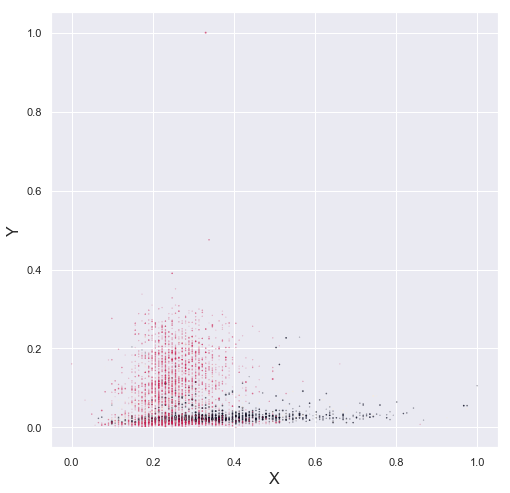

In [15]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

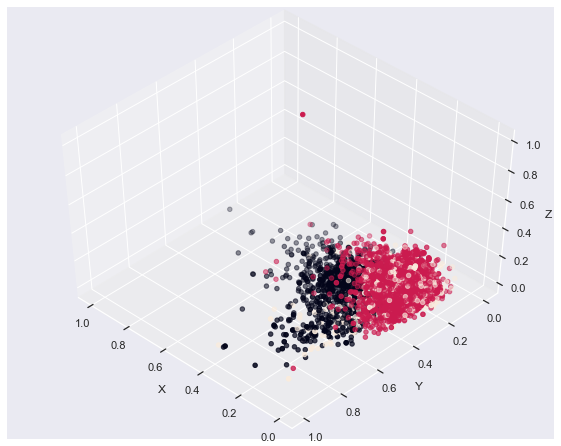

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

1    3838
0    1382
2    1277
Name: KM_Cluster, dtype: int64


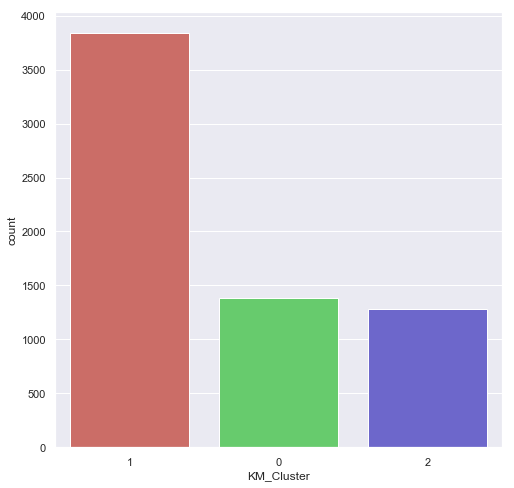

In [17]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [18]:
data[data['KM_Cluster']== 1].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color#,KM_Cluster
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,1
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,1
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,1
1605,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,1,1
1606,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,1
1607,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,1
1608,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0,1,1


In [19]:
data[data['KM_Cluster']== 2].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color#,KM_Cluster
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1,0,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1,0,2
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,1,0,2
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7,1,0,2
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7,1,0,2
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,1,0,2
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7,1,0,2
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7,1,0,2
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7,1,0,2
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7,1,0,2


In [20]:
data[data['KM_Cluster']== 0].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color#,KM_Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0,0,0
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0,0
